# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

### Announcements

1. you can use sklearn for ridge and lasso regression.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [4]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_data = list()
with open('drive/MyDrive/train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('drive/MyDrive/test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`
<br>
$y = \alpha + \beta _1 x_1 + \beta _2 x_2 + \beta _3 x_3 + ... + \beta _{25} x_{25}$ + $\epsilon$
- $\epsilon$ is model error
- $\alpha$ is $y$-intercept
- $\beta _i$ is regression coefficient.

- how to best fit to data? given $y = w^Tx$
- need to minimize the cost function $J(w) = \sum^N_{i=1} ((w^Tx_i+b)-y_i)^2$: quadratic function and hence convex by guarantee, very nice global minima sitting there. vectors here
  - $w$ are parameters, is linear in terms of $w$.
  - why square and not absolute? because easier to optimize, convex by default.

- We can train the model by computing dot products on weights and adding a bias term. The weights are updated after every epoch, performing a gradient descent. The bias is then updated after each epoch and then it is updated and checked. The cost function is implemented by taking difference the between predicted values, squaring them, summing them and dividing by shape value. It can then be used to predict the models with the updated weights.

In [10]:
# 1.3.1.2
# implement Linear Regression
'''
  our goal is to minimize the cost function, which for 
  linear regression is the ROOT MSE between predicted y and true y.
'''
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# it appear that the scale of each variable is the same, so we omit normalization
# Creating the gradient descent function
  
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        
        loss = z - y

        weight_gradient = (1/len(y)) * np.dot(x.T,loss)
        bias_gradient = np.sum(loss) / len(y)
        cost = (0.5/len(y)) * np.sum((np.square(loss)))
        cost_list[epoch] = cost

        w = w - (learning_rate*weight_gradient)
        b = b - (learning_rate*bias_gradient)
        
        # if (epoch%(epochs/10)==0):
        #     print("Cost is:",cost)

        if cost < 0.0001:
          break
        
    return w, b, cost_list

def predict(w,b,x_test):
  x_test = np.array(x_test)
  y_pred = x_test.dot(w)+b
  # y_pred = np.array(y_pred)
  # print(len(y_pred))
  # for ind, i in enumerate(x_test):
    # y_pred[ind] = i.dot(w) + b

  return y_pred

def mse(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error = sum_error + ((predicted[i] - actual[i]) ** 2)
  mean_error = sum_error / float(len(actual))
  return np.sqrt(mean_error)

# 1d to 2d conversion
y_train = np.reshape(y_train, (-1, 1))

w, bias, c = GradientDescent(x_train, y_train, np.zeros((x_train.shape[1], 1)), 0, 0.03, 10000)
# print("bias is:", bias)
# print(c)
# plt.plot(c)
y_pred = predict(w,bias,x_test)
# print(y_pred)



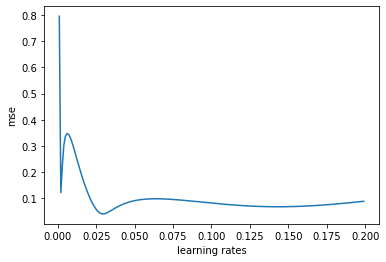

In [11]:
# 1.3.2.3
# try with different learning rates and choose the best one
learning_rates = np.arange(0.001, 0.2, 0.001)
val=[]
for i in learning_rates:
  w, bias, c = GradientDescent(x_train, y_train, np.zeros((x_train.shape[1], 1)), 0,i, 10000)
  val.append(mse(predict(w,bias,x_test),y_test))
plt.plot(learning_rates,val)
plt.xlabel("learning rates")
plt.ylabel("mse")

plt.show()
  

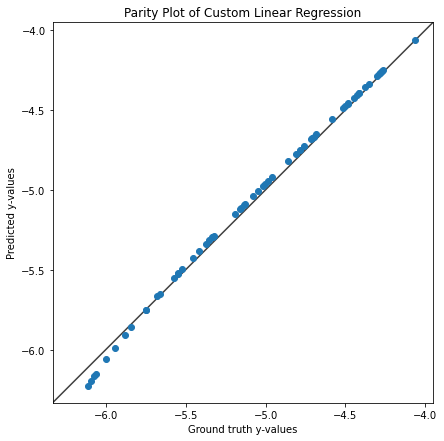

In [12]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`
Used for constraining model parameters, Ridge Regression, also known as L2 regression, is a technique used to analyze multi-linear regression (multicollinear), and used when predicted values are greater than the observed values. It adds a regularization penalty to the loss function during training.

In [13]:
# 1.3.2.2
# you should not have imported sklearn before this point
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. 

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
- The paramter changes with time, RMSE decreases with increase in alpha and reaches a minima. However, the global minima was at value 0.0, which indicates that the curve could fit in completely without any penalization. This is because of the nature of the dataset and is not always the case as in real world datasets, there is correlation between parameters and hence regularization is of utmost importance to modify weights.

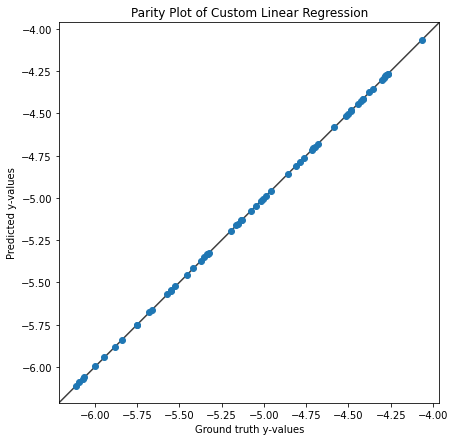

In [14]:
# 1.3.2.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`
- Lasso regression is a regularization technique used over regression methods for a more accurate prediction. This model uses shrinkage, wherein data values are shrunk towards a central point as the mean.

In [15]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.01)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
- The parameter alpha, as we previously discussed, increases the significance of the penalising value (in this case, the coefficient sum), and after reaching a minima, it grows as the value increases, exhibiting a modest dependence in accordance with the L1-norm.
The value in lasso regression exhibits a minor minima near 0.01 as was discussed in class regarding contours, and it will thereafter increase since the weights are being severely penalised and are therefore of little utility.

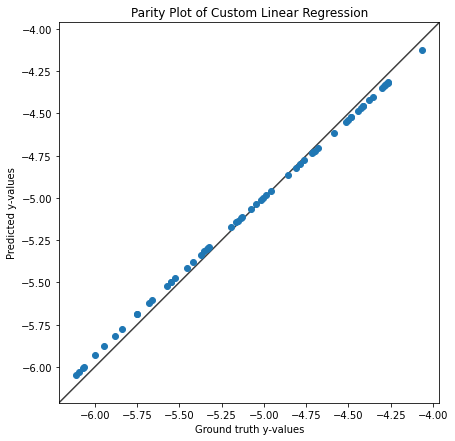

In [16]:
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()